# Figure Sizing for LaTeX Documents

The `mpl_tex_settings.py` file includes a key function `set_size()` that calculates optimal figure dimensions based on your LaTeX document's text width. This ensures your figures fit perfectly in your document without requiring scaling, which can distort text and make it inconsistent.

## Key parameters to understand:

1. **Document width (latex_doc_width)**: 
   - Currently set to `441.01775pt` (points)
   - You can find your document's text width by adding `\the\textwidth` in your LaTeX file

2. **Fraction parameter**:
   - Default is `0.5` (half text width)
   - Use `1.0` for full-width figures

3. **Height ratio**:
   - Controls the aspect ratio (height/width)
   - Default uses the golden ratio ≈ 0.618 for aesthetically pleasing proportions

4. **Subplots parameter**:
   - Adjusts height for grid layouts like `(2,2)` for 2×2 subplots

Let's demonstrate these settings with some examples:

⚠️ No preferred serif fonts found.


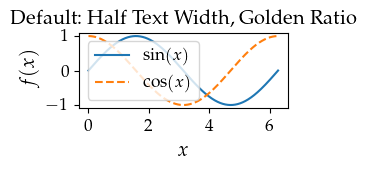

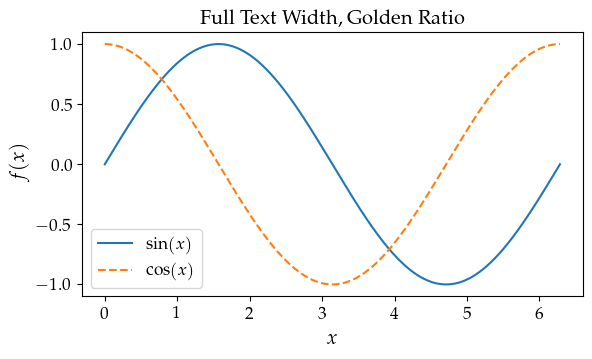

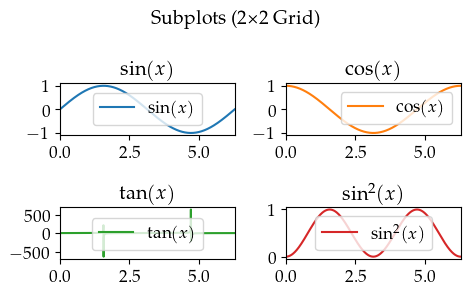

Note how each figure size is optimized for the document width and layout requirements.
Current document width: 441.01775pt
Dimensions of each figure (width × height in inches):
1. Default (half width): (3.051181333886813, 1.885733770181292)
2. Full width: (6.102362667773626, 3.771467540362584)
3. Half width, custom ratio: (3.051181333886813, 2.2883860004151098)
4. 2×2 subplot grid: (4.881890134218902, 3.0171740322900678)


In [1]:
# Demonstrate different figure sizing options
import numpy as np
import matplotlib.pyplot as plt
from config.mpl_tex_settings import *

# Create example data
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

# 1. Default figure size (half text width, golden ratio)
fig1, ax1 = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.5))
ax1.plot(x, y1, 'C0-', label=r'$\sin(x)$')
ax1.plot(x, y2, 'C1--', label=r'$\cos(x)$')
ax1.set_title(r'Default: Half Text Width, Golden Ratio')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$f(x)$')
ax1.legend()
plt.tight_layout()
plt.show()

# 2. Full text width, golden ratio
fig2, ax2 = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=1.0))
ax2.plot(x, y1, 'C0-', label=r'$\sin(x)$')
ax2.plot(x, y2, 'C1--', label=r'$\cos(x)$')
ax2.set_title(r'Full Text Width, Golden Ratio')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$f(x)$')
ax2.legend()
plt.tight_layout()
plt.show()

# 3. Display subplot configuration (2x2 grid)
fig3, axs = plt.subplots(2, 2, figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.8, subplots=(2, 2)))
fig3.suptitle('Subplots (2×2 Grid)', fontsize=14)

# Plot different data in each subplot
functions = [
    (np.sin, r'$\sin(x)$', 'C0'),
    (np.cos, r'$\cos(x)$', 'C1'),
    (np.tan, r'$\tan(x)$', 'C2'),
    (lambda x: np.sin(x)**2, r'$\sin^2(x)$', 'C3')
]

for i, (ax, (func, label, color)) in enumerate(zip(axs.flat, functions)):
    ax.plot(x, func(x), color=color, label=label)
    ax.set_title(label)
    ax.set_xlim(0, 2*np.pi)
    ax.legend()

plt.tight_layout()
plt.show()

print("Note how each figure size is optimized for the document width and layout requirements.")
print(f"Current document width: {LATEX_DOC_WIDTH}pt")
print("Dimensions of each figure (width × height in inches):")
print(f"1. Default (half width): {set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.5)}")
print(f"2. Full width: {set_size(width_pt=LATEX_DOC_WIDTH, fraction=1.0)}")
print(f"3. Half width, custom ratio: {set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.5, height_ratio=0.75)}")
print(f"4. 2×2 subplot grid: {set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.8, subplots=(2, 2))}")

## Scientific Notation with LaTeX Formatting

The `format_sci_notation()` function provides properly formatted scientific notation for plot labels and text. This is especially important in scientific publications where numbers need consistent and precise representation.

Key features:
- Converts numbers to LaTeX-formatted scientific notation (e.g., $1.2 \times 10^3$ instead of 1200)
- Handles very large and very small numbers elegantly
- Simplifies when the coefficient is 1 (e.g., $10^6$ instead of $1 \times 10^6$)
- Options to customize decimal places and LaTeX delimiters

Standard scientific notation examples:
0.0001 → $10^{-4}$
1000 → $10^{3}$
2.5e-6 → $2.5 \times 10^{-6}$
1e5 → $10^{5}$
Pi (π) → $3.142 \times 10^{0}$

Controlling decimal places:
0.0001 (1 decimal): $10^{-4}$
0.0001 (3 decimals): $10^{-4}$

Without LaTeX dollar delimiters (for use inside math environments):
1e-3 → 10^{-3}


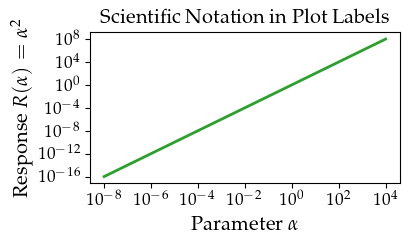

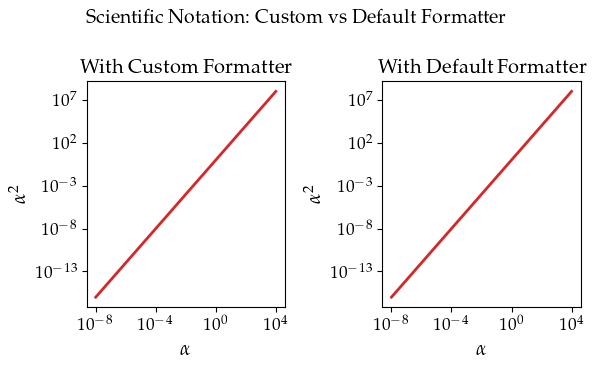

In [2]:
# Example of scientific notation formatting
print("Standard scientific notation examples:")
print(f"0.0001 → {format_sci_notation(0.0001)}")
print(f"1000 → {format_sci_notation(1000)}")
print(f"2.5e-6 → {format_sci_notation(2.5e-6)}")
print(f"1e5 → {format_sci_notation(1e5)}")
print(f"Pi (π) → {format_sci_notation(np.pi, decimals=3)}")

# With different decimal places
print("\nControlling decimal places:")
print(f"0.0001 (1 decimal): {format_sci_notation(0.0001, decimals=1)}")
print(f"0.0001 (3 decimals): {format_sci_notation(0.0001, decimals=3)}")

# Without LaTeX dollar signs (for use in existing math environments)
print("\nWithout LaTeX dollar delimiters (for use inside math environments):")
print(f"1e-3 → {format_sci_notation(1e-3, include_dollar=False)}")

# Create a plot demonstrating scientific notation in axis labels
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.7))

# Generate data spanning multiple orders of magnitude
x = np.logspace(-8, 4, 1000)
y = x**2

# Plot using log-log scale for wide range of values
ax.loglog(x, y, 'C2-', linewidth=2)
ax.set_xlabel(r'Parameter $\alpha$')
ax.set_ylabel(r'Response $R(\alpha) = \alpha^2$')
ax.set_title('Scientific Notation in Plot Labels')

# Define tick positions spanning different orders of magnitude
xticks = [1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2, 1e4]
yticks = [1e-16, 1e-12, 1e-8, 1e-4, 1e0, 1e4, 1e8]

# Apply the custom scientific notation formatter to tick labels
ax.set_xticks(xticks)
ax.set_xticklabels([format_sci_notation(val) for val in xticks])

ax.set_yticks(yticks)
ax.set_yticklabels([format_sci_notation(val) for val in yticks])

# Add a grid for readability

plt.tight_layout()
plt.show()

# Show how this works with matplotlib's default formatter for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=1.0))
fig.suptitle('Scientific Notation: Custom vs Default Formatter', fontsize=14)

# Plot 1: Using our custom formatter
ax1.loglog(x, y, 'C3-', linewidth=2)
ax1.set_title('With Custom Formatter')
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel(r'$\alpha^2$')
ax1.set_xticks(xticks[::2])  # Use fewer ticks for clarity
ax1.set_xticklabels([format_sci_notation(val) for val in xticks[::2]])

# Plot 2: Using matplotlib's default formatter
ax2.loglog(x, y, 'C3-', linewidth=2)
ax2.set_title('With Default Formatter')
ax2.set_xlabel(r'$\alpha$')
ax2.set_ylabel(r'$\alpha^2$')
ax2.set_xticks(xticks[::2])  # Use fewer ticks for clarity

plt.tight_layout()
plt.show()

## Font Selection and Text Rendering

The `mpl_tex_settings.py` module helps maintain consistent typography by:

1. **Font Selection**: Automatically choosing the best serif font available on your system
   - Preferred order: Palatino, CMU Serif, Times New Roman
   - Falls back gracefully if preferred fonts aren't available

2. **LaTeX vs. Mathtext**: Detecting LaTeX availability and configuring accordingly
   - Uses real LaTeX rendering if available for professional typesetting
   - Falls back to matplotlib's built-in mathtext renderer if LaTeX isn't installed

3. **Font Size Matching**: Converting between LaTeX and matplotlib point sizes
   - Uses `calculate_matching_font_size()` to ensure consistent sizing

Let's examine the current font configuration:

In [3]:
# Display current font configuration
print(f"Font Settings:")
print(f"- Current font: {font_to_use}")
print(f"- LaTeX available: {latex_available}")
print(f"- Font size (pts): {DEFAULT_FONT_SIZE}")
print(f"- Original LaTeX font size: {LATEX_FONT_SIZE}pt")
print(f"- Conversion factor: 1.13636 (matplotlib to LaTeX ratio)")

# Show font rendering example
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.8))

# Create example text with various formatting
text = [
    r"$\mathbf{Bold\ math:}$ $\mathbf{x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}}$",
    r"$\mathit{Italic\ math:}$ $\mathit{F = ma}$",
    r"$\mathcal{Calligraphic:}$ $\mathcal{L}\{f(t)\} = F(s)$",
    r"$\mathfrak{Fraktur:}$ $\mathfrak{A}, \mathfrak{B}, \mathfrak{C}$",
    r"$\mathbb{Blackboard\ bold:}$ $\mathbb{R}, \mathbb{Z}, \mathbb{N}$",
    r"Superscripts: $x^2, e^{i\pi}$",
    r"Subscripts: $x_i, a_{i,j}$",
    r"Mixed: $\sum_{i=0}^{n} x_i^2$",
    r"Greek: $\alpha, \beta, \gamma, \Delta, \Omega$",
    r"Special: $\nabla \times \vec{F} = \vec{\omega}, \oint_C \vec{F} \cdot d\vec{r} = 0$"
]

# Add text samples
y_positions = np.linspace(0.9, 0.1, len(text))
for t, y in zip(text, y_positions):
    ax.text(0.05, y, t, transform=ax.transAxes, fontsize=12)

# Remove axes for cleaner look
ax.set_axis_off()

# Add title
ax.set_title(f"Font Rendering Examples with {font_to_use}\n" + 
             f"({'LaTeX' if latex_available else 'Mathtext'} mode)")

plt.tight_layout()
plt.show()

# Create a demonstration of font size scaling
sizes = [8, 10, 12, 14, 16, 18]
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.7))

# Plot text at different sizes
for i, size in enumerate(sizes):
    y_pos = 0.85 - i*0.15
    ax.text(0.1, y_pos, f"{size}pt: Sample Text", fontsize=size, transform=ax.transAxes)
    ax.text(0.5, y_pos, f"{size}pt: $E = mc^2$", fontsize=size, transform=ax.transAxes)

ax.set_title("Font Size Scaling")
ax.set_axis_off()  # Hide axes
plt.tight_layout()
plt.show()

Font Settings:
- Current font: serif
- LaTeX available: True
- Font size (pts): 12.49996
- Original LaTeX font size: 11pt
- Conversion factor: 1.13636 (matplotlib to LaTeX ratio)


RuntimeError: latex was not able to process the following string:
b'$\\\\mathfrak{Fraktur:}$ $\\\\mathfrak{A}, \\\\mathfrak{B}, \\\\mathfrak{C}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp8s7w94he fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/physics/physics.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def))))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathpazo.sty)
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ppl.fd)
No file fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omlzplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omszplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omxzplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1zplm.fd)
! Undefined control sequence.
<recently read> \mathfrak 
                          
l.30 {\rmfamily $\mathfrak
                          {Fraktur:}$ $\mathfrak{A}, \mathfrak{B}, \mathfrak...
No pages of output.
Transcript written on tmp8s7w94he/fff81eabf0679f0b69aa8104b717b1818755775d4d551
fc12c2731ebc4cacfd9.log.




Error in callback <function _draw_all_if_interactive at 0x780c086ad800> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$\\\\mathfrak{Fraktur:}$ $\\\\mathfrak{A}, \\\\mathfrak{B}, \\\\mathfrak{C}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpwsnbph3p fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/physics/physics.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def))))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathpazo.sty)
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ppl.fd)
No file fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omlzplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omszplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omxzplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1zplm.fd)
! Undefined control sequence.
<recently read> \mathfrak 
                          
l.30 {\rmfamily $\mathfrak
                          {Fraktur:}$ $\mathfrak{A}, \mathfrak{B}, \mathfrak...
No pages of output.
Transcript written on tmpwsnbph3p/fff81eabf0679f0b69aa8104b717b1818755775d4d551
fc12c2731ebc4cacfd9.log.




RuntimeError: latex was not able to process the following string:
b'$\\\\mathfrak{Fraktur:}$ $\\\\mathfrak{A}, \\\\mathfrak{B}, \\\\mathfrak{C}$'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpy2o093j5 fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-01-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texmf/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/physics/physics.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def))))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathpazo.sty)
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1ppl.fd)
No file fff81eabf0679f0b69aa8104b717b1818755775d4d551fc12c2731ebc4cacfd9.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omlzplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omszplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/omxzplm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/ot1zplm.fd)
! Undefined control sequence.
<recently read> \mathfrak 
                          
l.30 {\rmfamily $\mathfrak
                          {Fraktur:}$ $\mathfrak{A}, \mathfrak{B}, \mathfrak...
No pages of output.
Transcript written on tmpy2o093j5/fff81eabf0679f0b69aa8104b717b1818755775d4d551
fc12c2731ebc4cacfd9.log.




<Figure size 488.189x301.717 with 1 Axes>

## Saving Figures Consistently

The `save_fig()` function provides a consistent way to save figures across your project:

- Supports multiple file formats in one call (png, pdf, svg, etc.)
- Automatically creates directories if they don't exist
- Uses consistent DPI and transparency settings
- Applies tight bounding box for optimal layout

This helps maintain a consistent look and feel for all figures in your thesis.

# Using LaTeX-compatible plotting in notebooks

This notebook demonstrates how to use the `mpl_tex_settings` module in Jupyter notebooks for professional, LaTeX-compatible scientific plotting.

The `mpl_tex_settings.py` module provides consistent matplotlib settings for the Master's thesis project and handles:
- LaTeX-compatible text rendering (when LaTeX is available)
- Consistent figure sizing based on your LaTeX document width
- Scientific notation formatting
- Font selection and sizing
- Automatic backend detection for different environments
- Figure saving in multiple formats

You can import the module at the beginning of any script to apply these settings automatically.

In [ ]:
import numpy as np
import sys
import os

# Add the path to import the config module
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import the matplotlib settings
from config.mpl_tex_settings import *
import matplotlib as mpl
import matplotlib.pyplot as plt

# Confirm that settings are loaded and show current configuration
print(f"📊 Matplotlib settings loaded")
print(f"   - LaTeX rendering: {'Enabled' if latex_available else 'Disabled (fallback to mathtext)'}")
print(f"   - Font: {font_to_use}")
print(f"   - Backend: {mpl.get_backend()}")
print(f"   - Default figure size: {DEFAULT_FIGSIZE}")
print(f"   - LaTeX document width: {LATEX_DOC_WIDTH}pt")
print(f"   - Default font size: {DEFAULT_FONT_SIZE}pt")
print(f"   - Default DPI: {DEFAULT_DPI}")
print(f"   - Default format: {DEFAULT_FIG_FORMAT}")

📊 Matplotlib settings loaded
   - LaTeX rendering: Enabled
   - Font: serif
   - Backend: module://matplotlib_inline.backend_inline
   - Default figure size: (3.051181333886813, 1.885733770181292)
   - LaTeX document width: 441.01775pt
   - Default font size: 12.49996pt
   - Default DPI: 50
   - Default format: png


## Example Plot with Scientific Formatting

Let's create a plot with proper scientific formatting using our LaTeX settings.

In [ ]:
from scipy.special import factorial
# Function to generate data
def quantum_oscillator(t, omega, n):
    """Generate quantum harmonic oscillator wavefunction probability density."""
    # Hermite polynomial (physicist's version)
    def hermite(x, n):
        if n == 0:
            return np.ones_like(x)
        elif n == 1:
            return 2 * x
        else:
            return 2 * x * hermite(x, n-1) - 2 * (n-1) * hermite(x, n-2)
    
    # Constants
    hbar = 1.0  # Normalized units
    m = 1.0     # Normalized mass
    
    # Position space
    x = np.linspace(-5, 5, 1000)
    
    # Angular frequency and time evolution
    phase = omega * t
    
    # Normalization constant
    norm = 1.0 / (np.sqrt(2**n * factorial(n) * np.sqrt(np.pi)))
    
    # Wavefunction (time-independent part)
    psi = norm * hermite(x, n) * np.exp(-x**2 / 2) * np.exp(-1j * (n + 0.5) * phase)
    
    # Probability density
    prob_density = np.abs(psi)**2
    
    return x, prob_density

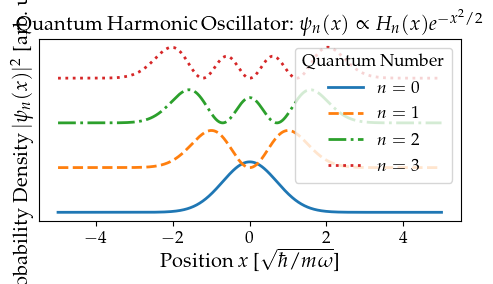

In [ ]:
# Create a figure with optimal size for LaTeX
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.8))

# Generate data for different quantum states
t = 0  # Initial time
omega = 1.0  # Angular frequency
max_n = 4  # Maximum quantum number

# Plot different quantum states with appropriate formatting
for n in range(max_n):
    x, prob = quantum_oscillator(t, omega, n)
    
    # Plot with proper styling
    ax.plot(x, prob + n*0.5,  # Offset for visibility
            color=f'C{n}',
            linestyle=LINE_STYLES[n % len(LINE_STYLES)],
            linewidth=2,
            label=f'$n={n}$')
    
# Add proper labels with LaTeX formatting
ax.set_xlabel(r'Position $x$ [$\sqrt{\hbar/m\omega}$]')
ax.set_ylabel(r'Probability Density $|\psi_n(x)|^2$ [arb. units]')

# Set title with LaTeX equation
ax.set_title(r'Quantum Harmonic Oscillator: $\psi_n(x) \propto H_n(x)e^{-x^2/2}$')

# Add legend
ax.legend(title=r'Quantum Number', frameon=True, loc='upper right')

# Remove y-ticks as they are arbitrary
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()

## Saving Figures

Use the `save_fig` function to save figures consistently:

Example 1: Default settings (PNG format)
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/demo_figure_default (png)
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/demo_figure_default (png)

Example 2: Multiple formats (PDF, PNG, SVG)

Example 2: Multiple formats (PDF, PNG, SVG)
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/demo_figure_multiformat (pdf, png, svg)
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/demo_figure_multiformat (pdf, png, svg)

Example 3: High-resolution PNG (300 DPI)

Example 3: High-resolution PNG (300 DPI)
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/demo_figure_highres (png)
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/demo_figure_highres (png)

Example 4: Custom figure size override

Example 4: Custom figure size override
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/demo_figure_custom_size (png)
Figure saved as

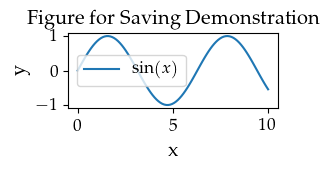

In [ ]:
# Create a simple demonstration figure
fig, ax = plt.subplots(figsize=set_size(width_pt=LATEX_DOC_WIDTH, fraction=0.6))
x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), 'C0-', label=r'$\sin(x)$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Figure for Saving Demonstration')
ax.legend()

# Example 1: Save with default settings
print("Example 1: Default settings (PNG format)")
save_fig(fig, 'demo_figure_default')

# Example 2: Save in multiple formats
print("\nExample 2: Multiple formats (PDF, PNG, SVG)")
save_fig(fig, 'demo_figure_multiformat', formats=['pdf', 'png', 'svg'])

# Example 3: Custom DPI for high-resolution
print("\nExample 3: High-resolution PNG (300 DPI)")
save_fig(fig, 'demo_figure_highres', formats=['png'], dpi=300)

# Example 4: Custom size override
print("\nExample 4: Custom figure size override")
save_fig(fig, 'demo_figure_custom_size', 
         formats=['png'], 
         figsize=(8, 4))  # Override the figure size before saving

# Example 5: Save to specific directory
from config.paths import FIGURES_DIR
custom_dir = FIGURES_DIR / "notebook_examples"
print(f"\nExample 5: Save to specific directory: {custom_dir}")
save_fig(fig, 'demo_figure_custom_dir', 
         output_dir=custom_dir)

print("\nAll figures have been saved to the appropriate locations.")
print("Remember that figures from notebooks are typically saved to the figures/tests directory")
print("unless you specify another location.")

## Using Scientific Notation

The `format_sci_notation` function helps with properly formatted scientific notation:

Standard values:
0.0001 → $10^{-4}$
1000 → $10^{3}$
2.5e-6 → $2.5 \times 10^{-6}$
1e5 → $10^{5}$


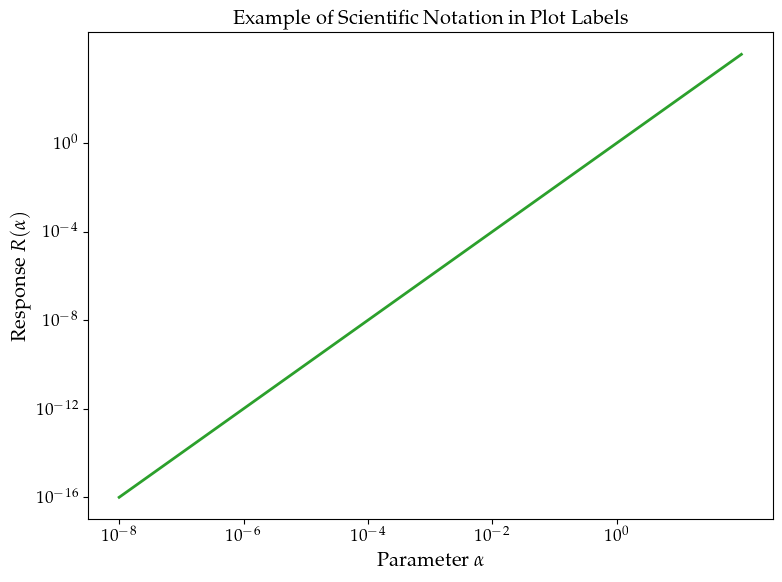

In [ ]:
# Example of scientific notation formatting
print(f"Standard values:")
print(f"0.0001 → {format_sci_notation(0.0001)}")
print(f"1000 → {format_sci_notation(1000)}")
print(f"2.5e-6 → {format_sci_notation(2.5e-6)}")
print(f"1e5 → {format_sci_notation(1e5)}")

# Create a simple plot with scientific notation
fig, ax = plt.subplots(figsize=(8, 6))
x = np.logspace(-8, 2, 1000)
y = x**2

ax.loglog(x, y, 'C2-', linewidth=2)
ax.set_xlabel('Parameter $\\alpha$')
ax.set_ylabel('Response $R(\\alpha)$')

# Add formatted tick labels
ax.set_xticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax.set_xticklabels([format_sci_notation(val) for val in [1e-8, 1e-6, 1e-4, 1e-2, 1e0]])

ax.set_yticks([1e-16, 1e-12, 1e-8, 1e-4, 1e0])
ax.set_yticklabels([format_sci_notation(val) for val in [1e-16, 1e-12, 1e-8, 1e-4, 1e0]])

plt.title('Example of Scientific Notation in Plot Labels')
plt.tight_layout()
plt.show()

## Testing TeX Syntax Rendering With and Without LaTeX

This section demonstrates how matplotlib handles TeX syntax when LaTeX is available or not available on the system.

Current TeX setting: Enabled


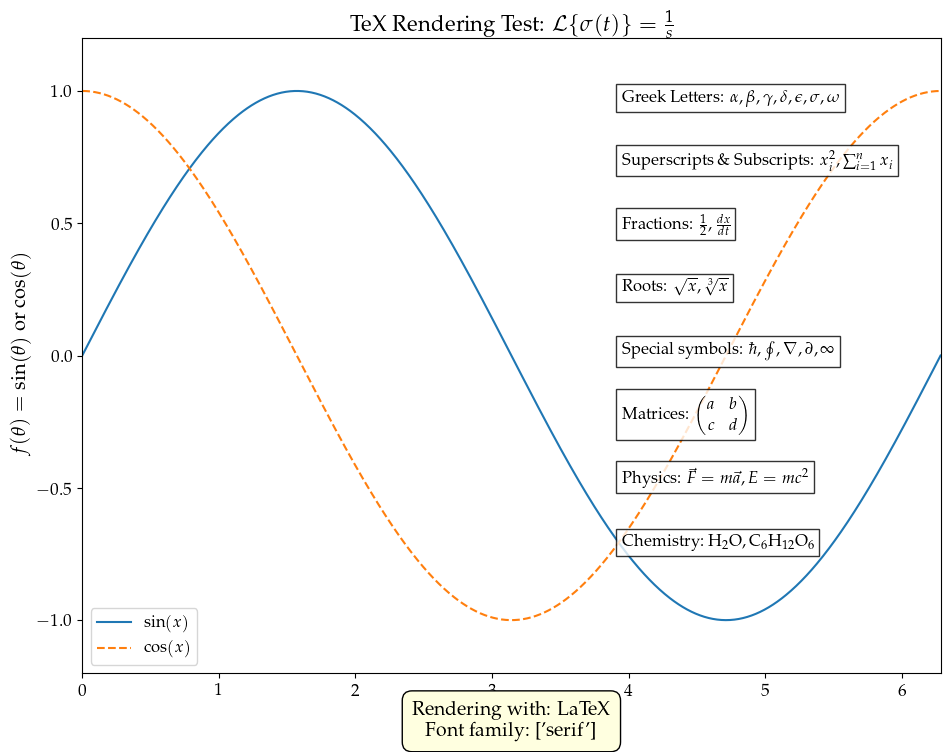

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Plot rendered using: LaTeX

Forcing TeX setting: Disabled


ValueError: 
\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)
      ^
ParseSyntaxException: Expected '\\right', found '\'  (at char 6), (line:1, col:7)

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Error in callback <function _draw_all_if_interactive at 0x7c4d8e8758a0> (for post_execute):


ValueError: 
\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)
      ^
ParseSyntaxException: Expected '\\right', found '\'  (at char 6), (line:1, col:7)

ValueError: 
\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)
      ^
ParseSyntaxException: Expected '\\right', found '\'  (at char 6), (line:1, col:7)

<Figure size 1000x800 with 1 Axes>

In [ ]:
# Create a function to demonstrate TeX rendering
def compare_tex_rendering(use_tex=None):
    """
    Create a plot with various TeX syntaxes to show how they're rendered.
    
    Parameters:
    -----------
    use_tex : bool or None
        If None, uses system default (based on LaTeX availability)
        If True, forces LaTeX rendering
        If False, forces mathtext rendering
    """
    # Save current state
    current_usetex = plt.rcParams['text.usetex']
    
    # Set requested rendering mode if specified
    if use_tex is not None:
        plt.rcParams['text.usetex'] = use_tex
    
    # Create a plot with various TeX expressions
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create some data
    x = np.linspace(0, 2*np.pi, 1000)
    y1 = np.sin(x)
    y2 = np.cos(x)
    
    # Plot with TeX labels
    ax.plot(x, y1, 'C0-', label=r'$\sin(x)$')
    ax.plot(x, y2, 'C1--', label=r'$\cos(x)$')
    
    # Add a grid and legend
    ax.legend(fontsize=12)
    
    # Check if we're using LaTeX or mathtext
    using_latex = plt.rcParams['text.usetex']
    
    # Add title with appropriate rendering
    plt.title(r'TeX Rendering Test: $\mathcal{L}\{\sigma(t)\} = \frac{1}{s}$', fontsize=16)
    
    # Add text annotations with various TeX elements
    # Using different syntax for matrix based on LaTeX availability
    if using_latex:
        matrix_text = r'Matrices: $\begin{pmatrix} a & b \\ c & d \end{pmatrix}$'
    else:
        matrix_text = r'Matrices: $\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)$'
    
    elements = [
        (0.1, 0.9, r'Greek Letters: $\alpha, \beta, \gamma, \delta, \epsilon, \sigma, \omega$'),
        (0.1, 0.8, r'Superscripts \& Subscripts: $x_i^2, \sum_{i=1}^{n} x_i$'),
        (0.1, 0.7, r'Fractions: $\frac{1}{2}, \frac{dx}{dt}$'),
        (0.1, 0.6, r'Roots: $\sqrt{x}, \sqrt[3]{x}$'),
        (0.1, 0.5, r'Special symbols: $\hbar, \oint, \nabla, \partial, \infty$'),
        (0.1, 0.4, matrix_text),
        (0.1, 0.3, r'Physics: $\vec{F} = m\vec{a}, E = mc^2$'),
        (0.1, 0.2, r'Chemistry: $\mathrm{H}_2\mathrm{O}, \mathrm{C}_6\mathrm{H}_{12}\mathrm{O}_6$')
    ]
    
    for x_pos, y_pos, text in elements:
        ax.text(x_pos * 2*np.pi, y_pos, text, fontsize=12, 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    # Add information about rendering mode
    renderer = "LaTeX" if plt.rcParams['text.usetex'] else "Mathtext"
    font_family = plt.rcParams['font.family']
    
    ax.text(0.5, -0.1, f"Rendering with: {renderer}\nFont family: {font_family}", 
            ha='center', transform=ax.transAxes, fontsize=14,
            bbox=dict(facecolor='lightyellow', edgecolor='black', boxstyle='round,pad=0.5'))
            
    # Add x and y labels with TeX
    ax.set_xlabel(r'Angle $\theta$ [rad]')
    ax.set_ylabel(r'$f(\theta) = \sin(\theta)$ or $\cos(\theta)$')
    
    # Set axes limits
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1.2, 1.2)
    
    # Use figure.tight_layout instead of plt.tight_layout for better reliability
    fig.tight_layout(pad=2.0)
    plt.show()
    
    # Restore previous state
    plt.rcParams['text.usetex'] = current_usetex
    
    return renderer

# Run the function with the current system settings
print(f"Current TeX setting: {'Enabled' if plt.rcParams['text.usetex'] else 'Disabled'}")
current_renderer = compare_tex_rendering()
print(f"Plot rendered using: {current_renderer}")

# Force the opposite rendering to demonstrate the difference
opposite_setting = not plt.rcParams['text.usetex']
print(f"\nForcing TeX setting: {'Enabled' if opposite_setting else 'Disabled'}")
opposite_renderer = compare_tex_rendering(opposite_setting)
print(f"Plot rendered using: {opposite_renderer}")

# Show a comparison summary
print("\nComparison Summary:")
print("-" * 50)
print(f"1. {'LaTeX' if current_renderer == 'LaTeX' else 'Mathtext'} (System Default):")
if current_renderer == "LaTeX":
    print("   - Full LaTeX capabilities")
    print("   - Professional typesetting")
    print("   - Access to LaTeX packages")
    print("   - Consistent with document")
else:
    print("   - Built-in matplotlib renderer")
    print("   - No dependency on LaTeX")
    print("   - Faster rendering")
    print("   - Limited support for complex expressions")
    
print(f"\n2. {'LaTeX' if opposite_renderer == 'LaTeX' else 'Mathtext'} (Forced Alternative):")
if opposite_renderer == "LaTeX":
    print("   - Full LaTeX capabilities")
    print("   - Professional typesetting")
    print("   - Access to LaTeX packages")
    print("   - Consistent with document")
else:
    print("   - Built-in matplotlib renderer")
    print("   - No dependency on LaTeX")
    print("   - Faster rendering")
    print("   - Limited support for complex expressions")

### Understanding the Differences

The plots above demonstrate how matplotlib handles TeX syntax in two different scenarios:

1. **With LaTeX installed**: When LaTeX is available (`text.usetex=True`), matplotlib uses the actual LaTeX typesetting engine to render all text. This provides professional-quality mathematical typesetting with full support for LaTeX commands and packages.

2. **Without LaTeX installed**: When LaTeX is not available (`text.usetex=False`), matplotlib uses its built-in mathtext renderer. This is a TeX-like math expression parser and layout engine that can handle basic math notation but has limitations compared to full LaTeX.

#### Key Differences

| Feature | With LaTeX | Without LaTeX (mathtext) |
|---------|-----------|--------------------------|
| Typography quality | Professional LaTeX typesetting | Good but simpler |
| Complex expressions | Full LaTeX support | Limited capabilities |
| Special commands | All LaTeX commands available | Basic subset supported |
| Performance | Slower (requires external process) | Faster (built-in) |
| Dependencies | Requires LaTeX installation | No external dependencies |
| Font consistency | Perfectly matches LaTeX documents | Approximates LaTeX style |

#### Best Practices

Our configuration in `mpl_tex_settings.py` implements a flexible approach:

- Automatically detects if LaTeX is available and configures matplotlib accordingly
- Falls back to mathtext when LaTeX is not installed
- Provides consistent font styles and sizes regardless of rendering method
- Includes helper functions like `format_sci_notation()` that work in both modes

This way, your code works across different environments while providing the best possible rendering available on each system.

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_0 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_1 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_2 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_3 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_4 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_5 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_6 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_7 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_8 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/colorplot_9 (png)


findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

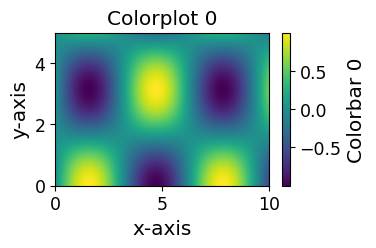

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

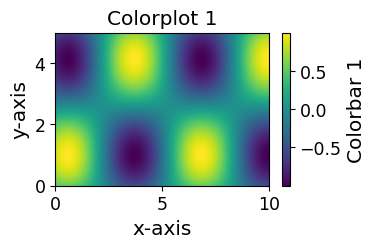

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

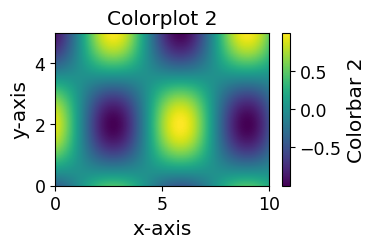

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

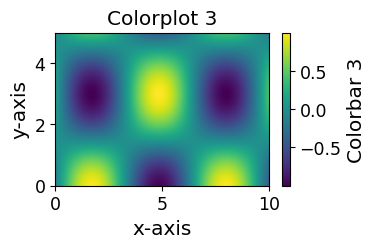

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

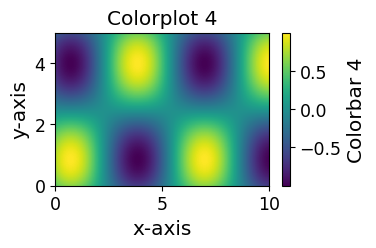

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

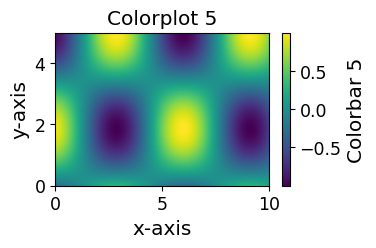

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

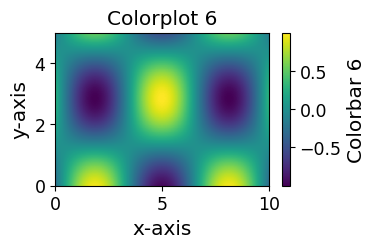

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

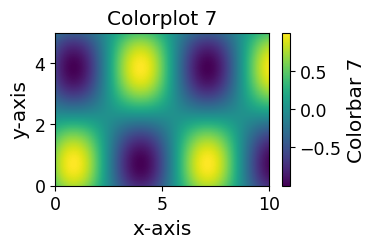

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

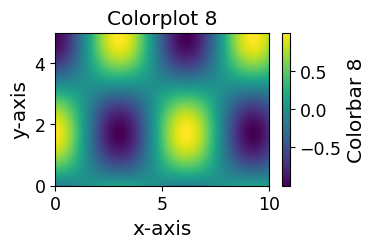

findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none of the following families were found: serif, cmu serif, times new roman, serif
findfont: Generic family 'serif' not found because none

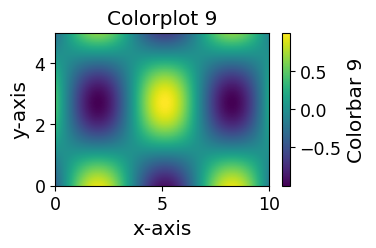

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy example data
n = 10  # Number of plots you want
figures = []

for i in range(n):
    x = np.linspace(0, 10, 1000)
    y = np.linspace(0, 5, 500)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(X + i) * np.cos(Y - i)  # Example data that changes per figure

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.pcolormesh(x, y, Z, shading="auto", cmap="viridis")
    fig.colorbar(c, ax=ax, label=f"Colorbar {i}")
    
    ax.set_title(f"Colorplot {i}")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    
    fig.tight_layout()
    figures.append(fig)

# Example: save them all
for i, fig in enumerate(figures):
    save_fig(fig, f"colorplot_{i}")


In [ ]:
import matplotlib

# =============================
# Force non-interactive backend and save a simple plot
# =============================

matplotlib.use('Agg')  # Force non-interactive backend

# Create a figure and plot x vs sin(x) as an example
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, np.sin(x), color='C0', linestyle='solid', label=r"$\sin(x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\sin(x)$")
ax.set_title(r"Non-interactive backend: $\sin(x)$ vs $x$")
ax.legend()

# Save using the provided helper
save_fig(fig, "non_interactive_sin_x")

🖥️  Matplotlib backend: module://matplotlib_inline.backend_inline
✅ Custom matplotlib settings loaded
🖥️  Backend after import: module://matplotlib_inline.backend_inline
📊 Creating test plot...
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/test_plot_agg (png)
Figure saved as: /home/leopold/Projects/Master_thesis/figures/tests/test_plot_agg (png)


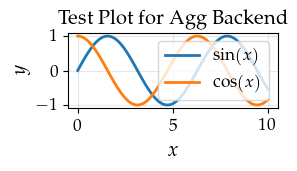

In [4]:
#!/usr/bin/env python3
"""
Test script to verify Agg backend functionality for HPC simulation.

This script tests whether matplotlib works correctly with the Agg backend
and saves plots as PNG files without attempting to display them.
"""

import matplotlib

print(f"🖥️  Matplotlib backend: {matplotlib.get_backend()}")

# Import our custom settings which should force Agg backend
try:
    from config.mpl_tex_settings import *

    print(f"✅ Custom matplotlib settings loaded")
    print(f"🖥️  Backend after import: {matplotlib.get_backend()}")
except ImportError as e:
    print(f"❌ Failed to import custom settings: {e}")
    matplotlib.use("Agg")  # Fallback

import matplotlib.pyplot as plt
import numpy as np
from config.paths import FIGURES_DIR
from config import mpl_tex_settings

# Create a simple test plot
print("📊 Creating test plot...")
fig, ax = plt.subplots(figsize=(8, 6))

# Generate some test data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot the data
ax.plot(x, y1, label=r"$\sin(x)$", linewidth=2)
ax.plot(x, y2, label=r"$\cos(x)$", linewidth=2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_title(r"Test Plot for Agg Backend")
ax.legend()
ax.grid(True, alpha=0.3)

save_fig(fig, 'test_plot_agg', formats=['png'])    
plt.show()